In [1]:
!dir csv\\normal_plan\\

 Volume in drive D is Data
 Volume Serial Number is 5CD7-5EF6

 Directory of d:\MOBILE_ROBOTICS\KairosData\csv\normal_plan

15/04/2022  17:41    <DIR>          .
15/04/2022  17:41    <DIR>          ..
27/03/2022  00:15         5.641.075 fufi-front_laser-scan.csv
27/03/2022  00:15           530.265 fufi-imu-data.csv
27/03/2022  00:18           567.105 fufi-joint_states.csv
27/03/2022  00:15         5.436.480 fufi-rear_laser-scan.csv
27/03/2022  00:15           233.816 fufi-robotnik_base_control-cmd_vel.csv
27/03/2022  00:15         1.071.244 fufi-robotnik_base_control-odom.csv
27/03/2022  00:15            39.318 fufi-robot_pose.csv
27/03/2022  00:15           114.609 fufi-vectornav-imu-temperature.csv
27/03/2022  00:15               582 topic_info.csv
               9 File(s)     13.634.494 bytes
               2 Dir(s)  211.391.856.640 bytes free


In [2]:
#!python37 -m jupyter nbextension install luxwidget
!python37 -m jupyter nbextension enable luxwidget --py

Enabling notebook extension luxwidget/extension...
      - Validating: ok


In [3]:
import lux
import pandas as pd

In [4]:
df_info = pd.read_csv("csv/normal_plan/topic_info.csv")
df_info

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
!dir csv/normal_plan
df = pd.read_csv("csv/normal_plan/fufi-front_laser-scan.csv")
df.info()
# "header.seq","header.stamp.secs","header.stamp.nsecs","header.frame_id", "angle_min","angle_max", "angle_increment","time_increment","scan_time","range_min","range_max"
df_sensor = df[["Time","ranges_0", "intensities_0","ranges_135", "intensities_135","ranges_270", "intensities_270","ranges_405", "intensities_405",
"ranges_540", "intensities_540"]]

df_sensor

Parameter format not correct - "normal_plan".


<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 463 entries, 0 to 462
Columns: 1094 entries, Time to intensities_540
dtypes: float64(1090), int64(3), object(1)
memory usage: 3.9+ MB


c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Time' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Time'] = pd.to_datetime(df['Time'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If Time is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'Time':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
df = pd.read_csv("csv/normal_plan/fufi-robot_pose.csv")
df.info()

df_robot_pose = df[['Time', 'position.x', 'position.y','orientation.z', 'orientation.w']]
df

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           356 non-null    float64
 1   position.x     356 non-null    float64
 2   position.y     356 non-null    float64
 3   position.z     356 non-null    float64
 4   orientation.x  356 non-null    float64
 5   orientation.y  356 non-null    float64
 6   orientation.z  356 non-null    float64
 7   orientation.w  356 non-null    float64
dtypes: float64(8)
memory usage: 22.4 KB


c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Time' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Time'] = pd.to_datetime(df['Time'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If Time is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'Time':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
import math
 
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        # return roll_x, pitch_y, yaw_z # in radians
        return yaw_z # in radians

In [8]:
xyz = []
for (z,w,y,x) in zip(df["orientation.z"],df["orientation.w"],df["orientation.y"],df["orientation.x"]):
    xyz.append(euler_from_quaternion(x, y, z, w))

df_robot_pose = df[['Time', 'position.x', 'position.y','orientation.z']]
df_robot_pose["orientation.z"] = xyz

df_robot_pose

c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3163: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Time' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Time'] = pd.to_datetime(df['Time'], format='<replace-with-datetime-format>')

See more at: https://pandas.pyd

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
# 27/03/2022  00:15           530.265 fufi-imu-data.csv
# 27/03/2022  00:18           567.105 fufi-joint_states.csv
# 27/03/2022  00:15           233.816 fufi-robotnik_base_control-cmd_vel.csv
# 27/03/2022  00:15         1.071.244 fufi-robotnik_base_control-odom.csv

# 27/03/2022  00:15           114.609 fufi-vectornav-imu-temperature.csv

df = pd.read_csv("csv/normal_plan/fufi-imu-data.csv")
df.info()
df = df[["Time","orientation.x","orientation.y","orientation.z","orientation.w","angular_velocity.x","angular_velocity.y","angular_velocity.z","linear_acceleration.x","linear_acceleration.y","linear_acceleration.z"]]
df

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time                              1393 non-null   float64
 1   header.seq                        1393 non-null   int64  
 2   header.stamp.secs                 1393 non-null   int64  
 3   header.stamp.nsecs                1393 non-null   int64  
 4   header.frame_id                   1393 non-null   object 
 5   orientation.x                     1393 non-null   float64
 6   orientation.y                     1393 non-null   float64
 7   orientation.z                     1393 non-null   float64
 8   orientation.w                     1393 non-null   float64
 9   orientation_covariance_0          1393 non-null   float64
 10  orientation_covariance_1          1393 non-null   float64
 11  orientation_covariance_2          1393 non-null   float64
 12  orient

c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Time' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Time'] = pd.to_datetime(df['Time'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If Time is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'Time':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
import math
 
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians

x_list=[]
y_list=[]
z_list=[]
for (z,w,y,x) in zip(df["orientation.z"],df["orientation.w"],df["orientation.y"],df["orientation.x"]):
        x_out,y_out,z_out = euler_from_quaternion(x, y, z, w)
        x_list.append(x_out)
        y_list.append(y_out)
        z_list.append(z_out)
        
df_imu = df[["Time","orientation.x","orientation.y","orientation.z","angular_velocity.x","angular_velocity.y","angular_velocity.z","linear_acceleration.x","linear_acceleration.y","linear_acceleration.z"]]
df_imu.columns = ["Time","orientation_imu.x","orientation_imu.y","orientation_imu.z","angular_velocity.x","angular_velocity.y","angular_velocity.z","linear_acceleration.x","linear_acceleration.y","linear_acceleration.z"]
df_imu["orientation_imu.x"] = x_list
df_imu["orientation_imu.y"] = y_list
df_imu["orientation_imu.z"] = z_list

df_imu

c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3163: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Time' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Time'] = pd.to_datetime(df['Time'], format='<replace-with-datetime-format>')

See more at: https://pandas.pyd

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
# 27/03/2022  00:18           567.105 fufi-joint_states.csv
# 27/03/2022  00:15           233.816 fufi-robotnik_base_control-cmd_vel.csv
# 27/03/2022  00:15         1.071.244 fufi-robotnik_base_control-odom.csv

# 27/03/2022  00:15           114.609 fufi-vectornav-imu-temperature.csv

df = pd.read_csv("csv/normal_plan/fufi-joint_states.csv")
df.info()
# [0,1,2,3,4] = ['fufi_back_left_wheel_joint', 'fufi_back_right_wheel_joint', 'fufi_front_left_wheel_joint', 'fufi_front_right_wheel_joint']

df_joints =df[['Time', 'position_0', 'position_1', 'position_2',
       'position_3', 'velocity_0', 'velocity_1', 'velocity_2', 'velocity_3',
       'effort_0', 'effort_1', 'effort_2', 'effort_3']]


<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                1800 non-null   float64
 1   header.seq          1800 non-null   int64  
 2   header.stamp.secs   1800 non-null   int64  
 3   header.stamp.nsecs  1800 non-null   int64  
 4   header.frame_id     0 non-null      float64
 5   name                1800 non-null   object 
 6   position_0          1800 non-null   float64
 7   position_1          1800 non-null   float64
 8   position_2          1800 non-null   float64
 9   position_3          1800 non-null   float64
 10  velocity_0          1800 non-null   float64
 11  velocity_1          1800 non-null   float64
 12  velocity_2          1800 non-null   float64
 13  velocity_3          1800 non-null   float64
 14  effort_0            1800 non-null   float64
 15  effort_1            1800 non-null   float64
 16  effort

In [12]:
# 27/03/2022  00:15           233.816 fufi-robotnik_base_control-cmd_vel.csv
# 27/03/2022  00:15         1.071.244 fufi-robotnik_base_control-odom.csv

# 27/03/2022  00:15           114.609 fufi-vectornav-imu-temperature.csv

df = pd.read_csv("csv/normal_plan/fufi-robotnik_base_control-cmd_vel.csv")
df.info()
df_cmd_vel = df
df_cmd_vel.columns = ['Time', 'linear_cmd_vel.x', 'linear_cmd_vel.y', 'linear_cmd_vel.z', 'angular_cmd_vel.x', 'angular_cmd_vel.y',
       'angular_cmd_vel.z']
df_cmd_vel

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       2871 non-null   float64
 1   linear.x   2871 non-null   float64
 2   linear.y   2871 non-null   float64
 3   linear.z   2871 non-null   float64
 4   angular.x  2871 non-null   float64
 5   angular.y  2871 non-null   float64
 6   angular.z  2871 non-null   float64
dtypes: float64(7)
memory usage: 157.1 KB


c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Time' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Time'] = pd.to_datetime(df['Time'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If Time is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'Time':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time                     1774 non-null   float64
 1   header.seq               1774 non-null   int64  
 2   header.stamp.secs        1774 non-null   int64  
 3   header.stamp.nsecs       1774 non-null   int64  
 4   header.frame_id          1774 non-null   object 
 5   child_frame_id           1774 non-null   object 
 6   pose.pose.position.x     1774 non-null   float64
 7   pose.pose.position.y     1774 non-null   float64
 8   pose.pose.position.z     1774 non-null   float64
 9   pose.pose.orientation.x  1774 non-null   float64
 10  pose.pose.orientation.y  1774 non-null   float64
 11  pose.pose.orientation.z  1774 non-null   float64
 12  pose.pose.orientation.w  1774 non-null   float64
 13  pose.covariance          1774 non-null   object 
 14  twist.twist.linear.x    

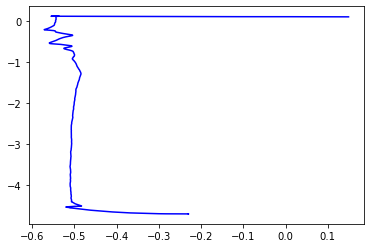

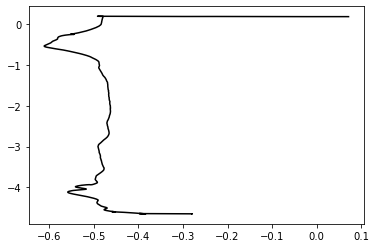

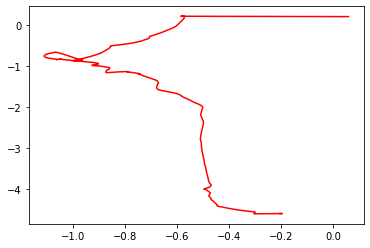

c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Time' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Time'] = pd.to_datetime(df['Time'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If Time is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'Time':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

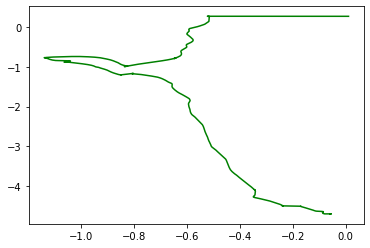

In [13]:
# 27/03/2022  00:15         1.071.244 fufi-robotnik_base_control-odom.csv

# 27/03/2022  00:15           114.609 fufi-vectornav-imu-temperature.csv

df = pd.read_csv("csv/normal_plan/fufi-robotnik_base_control-odom.csv")
df1 = pd.read_csv("csv/normal_plan_1/fufi-robotnik_base_control-odom.csv")
df2 = pd.read_csv("csv/window_plan/fufi-robotnik_base_control-odom.csv")
df3 = pd.read_csv("csv/window_plan_1/fufi-robotnik_base_control-odom.csv")
df.info()
df.columns

import matplotlib.pyplot as plt

plt.plot(df['pose.pose.position.x'],df['pose.pose.position.y'],'b')
plt.show()
plt.plot(df1['pose.pose.position.x'],df1['pose.pose.position.y'],'k')
plt.show()
plt.plot(df2['pose.pose.position.x'],df2['pose.pose.position.y'],'r')
plt.show()
plt.plot(df3['pose.pose.position.x'],df3['pose.pose.position.y'],'g')

pd.set_option('display.max_rows', None)
pd.set_option("display.precision", 20)
df['Time'] = df['Time']
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time                     1774 non-null   float64
 1   header.seq               1774 non-null   int64  
 2   header.stamp.secs        1774 non-null   int64  
 3   header.stamp.nsecs       1774 non-null   int64  
 4   header.frame_id          1774 non-null   object 
 5   child_frame_id           1774 non-null   object 
 6   pose.pose.position.x     1774 non-null   float64
 7   pose.pose.position.y     1774 non-null   float64
 8   pose.pose.position.z     1774 non-null   float64
 9   pose.pose.orientation.x  1774 non-null   float64
 10  pose.pose.orientation.y  1774 non-null   float64
 11  pose.pose.orientation.z  1774 non-null   float64
 12  pose.pose.orientation.w  1774 non-null   float64
 13  pose.covariance          1774 non-null   object 
 14  twist.twist.linear.x    

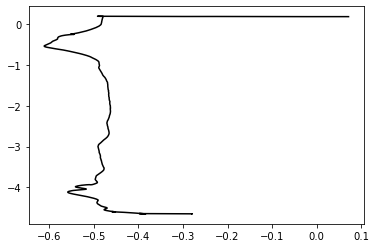

In [7]:
import pandas as pd
df = pd.read_csv("csv/normal_plan/fufi-robotnik_base_control-odom.csv")
df1 = pd.read_csv("csv/normal_plan_1/fufi-robotnik_base_control-odom.csv")
df2 = pd.read_csv("csv/window_plan/fufi-robotnik_base_control-odom.csv")
df3 = pd.read_csv("csv/window_plan_1/fufi-robotnik_base_control-odom.csv")
df.info()
df.columns

import matplotlib.pyplot as plt

# plt.plot(df1['pose.pose.position.x'],df1['pose.pose.position.y'],'k')
# plt.show()
import numpy as np
import matplotlib.pyplot as plt
import mpld3

fig, ax = plt.subplots()
lines = ax.plot(df1['pose.pose.position.x'],df1['pose.pose.position.y'],'k')

#mpld3.plugins.connect(fig, mpld3.plugins.PointLabelTooltip(lines[0],labels=df1['Time']))

#mpld3.display()

In [2]:
import pandas as pd
df = pd.read_csv("csv/normal_plan/fufi-robotnik_base_control-odom.csv")
df1 = pd.read_csv("csv/normal_plan_1/fufi-robotnik_base_control-odom.csv")
df2 = pd.read_csv("csv/window_plan/fufi-robotnik_base_control-odom.csv")
df3 = pd.read_csv("csv/window_plan_1/fufi-robotnik_base_control-odom.csv")
#df.info()
#df.columns

import matplotlib.pyplot as plt

# plt.plot(df1['pose.pose.position.x'],df1['pose.pose.position.y'],'k')
# plt.show()
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

df =df[['Time',"pose.pose.position.x","pose.pose.position.y"]]
df1 =df1[['Time',"pose.pose.position.x","pose.pose.position.y"]]
df2 =df2[['Time',"pose.pose.position.x","pose.pose.position.y"]]
df3 =df3[['Time',"pose.pose.position.x","pose.pose.position.y"]]


fig1 = px.line(df, x="pose.pose.position.x", y="pose.pose.position.y", hover_data=["Time"],title="Normal: Pose and time from odom")
fig1.update_traces(mode="markers+lines",line_color='red')
fig1.show()

fig2 = px.line(df1, x="pose.pose.position.x", y="pose.pose.position.y", hover_data=["Time"],title="Normal1: Pose and time from odom")
fig2.update_traces(mode="markers+lines",line_color='green')
fig2.show()

fig3 = px.line(df2, x="pose.pose.position.x", y="pose.pose.position.y", hover_data=["Time"],title="Window: Pose and time from odom")
fig3.update_traces(mode="markers+lines",line_color='blue')
fig3.show()

fig4 = px.line(df3, x="pose.pose.position.x", y="pose.pose.position.y", hover_data=["Time"],title="Window1: Pose and time from odom")
fig4.update_traces(mode="markers+lines",line_color='black')
fig4.show()


In [3]:
print(len(df2['Time']))

2399


In [4]:
print(len(df3['Time']))


2423


In [28]:
df =df3[['Time',"pose.pose.position.x","pose.pose.position.y"]]

fig = px.line(df, x="pose.pose.position.x", y="pose.pose.position.y", hover_data=["Time"],title="Pose and time")
fig.update_traces(mode="markers+lines")
#markers+lines
fig.show()

In [14]:
df_final = pd.concat([df_robot_pose,df_sensor,df_imu,df_joints, df_cmd_vel], axis=1)
#df_final=df_final.dropna()
df_final=df_final.loc[:,~df_final.columns.duplicated()]
df_final = df_final.fillna(method='ffill')
df_final

c:\Users\luigi\AppData\Local\Programs\Python\Python37\lib\site-packages\lux\executor\PandasExecutor.py:448: UserWarning:
Lux detects that the attribute 'Time' may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['Time'] = pd.to_datetime(df['Time'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If Time is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'Time':'quantitative'})


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df_final.to_csv("kairos_normal.csv")